In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import re
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy import ndimage

### #1

In [13]:
# X_train = np.load("../data/generator/generated_data.npy")
# Y_train = np.load("../data/generator/generated_data_labels.npy")
#
# X_train.shape, Y_train.shape

In [14]:
# X_train_ = np.repeat(X_train[..., np.newaxis], 3, -1)
# X_train_.shape

In [15]:
# y_train = np.zeros(Y_train.shape)
#
# y_train[Y_train == "attack"] = 1
# y_train[Y_train == "block"] = 2
# y_train[Y_train == "counterattack"] = 3
# y_train[Y_train == "cover"] = 4
# y_train[Y_train == "delay"] = 5
# y_train[Y_train == "destroy"] = 6
# y_train[Y_train == "disrupt"] = 7
# y_train[Y_train == "guard"] = 8
# y_train[Y_train == "occupy"] = 9
# y_train[Y_train == "retain"] = 10
# y_train[Y_train == "screen"] = 11
# y_train[Y_train == "secure"] = 12
# y_train[Y_train == "seize"] = 13
# y_train[Y_train == "support_by_fire"] = 14

### #2

In [55]:
Y_train = []
X_train = []

for angle in ([0, 45, 90, 135, 180, 225, 270, 315]):
    for filename in os.listdir("./train_data/"):
        img = cv2.imread("./train_data/" + filename)
        img2 = ndimage.rotate(img, angle, mode = "constant", cval = 255)
        img3 = cv2.resize(img2, [100,100])
        name = re.findall('([a-zA-Z_ ]*)\d*.*', filename)[0]
        X_train.append(img3)
        Y_train.append(name)

sharpening = np.array([[-1, -1, -1],
                       [-1, 10, -1],
                       [-1, -1, -1]])

for angle in ([0, 45, 90, 135, 180, 225, 270, 315]):
    for filename in os.listdir("./train_data/"):
        img = cv2.imread("./train_data/" + filename)
        img2 = ndimage.rotate(img, angle, mode = "constant", cval = 255)
        img3 = cv2.resize(img2, [100,100])
        img4 = cv2.filter2D(img3, -1, sharpening)
        name = re.findall('([a-zA-Z_ ]*)\d*.*', filename)[0]
        X_train.append(img4)
        Y_train.append(name)

for angle in ([0, 45, 90, 135, 180, 225, 270, 315]):
    for filename in os.listdir("./train_data/"):
        img = cv2.imread("./train_data/" + filename)
        img2 = ndimage.rotate(img, angle, mode = "constant", cval = 255)
        img3 = cv2.resize(img2, [100,100])
        img4 = cv2.flip(img3, 0)
        name = re.findall('([a-zA-Z_ ]*)\d*.*', filename)[0]
        X_train.append(img4)
        Y_train.append(name)

for angle in ([0, 45, 90, 135, 180, 225, 270, 315]):
    for filename in os.listdir("./train_data/"):
        img = cv2.imread("./train_data/" + filename)
        img2 = ndimage.rotate(img, angle, mode = "constant", cval = 255)
        img3 = cv2.resize(img2, [100,100])
        img4 = cv2.flip(img3, 1)
        name = re.findall('([a-zA-Z_ ]*)\d*.*', filename)[0]
        X_train.append(img4)
        Y_train.append(name)

for angle in ([0, 45, 90, 135, 180, 225, 270, 315]):
    for filename in os.listdir("./train_data/"):
        img = cv2.imread("./train_data/" + filename)
        img2 = ndimage.rotate(img, angle, mode = "constant", cval = 255)
        img3 = cv2.resize(img2, [100,100])
        # Gaussian noise
        gauss = np.random.normal(0, 1, img3.size)
        gauss = gauss.reshape(img3.shape[0], img3.shape[1], img3.shape[2]).astype('uint8')
        img4 = cv2.add(img, gauss)
        name = re.findall('([a-zA-Z_ ]*)\d*.*', filename)[0]
        X_train.append(img4)
        Y_train.append(name)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train.shape, Y_train.shape

((18000, 100, 100, 3), (18000,))

In [60]:
X_train = X_train / 255.

In [61]:
y_train = np.zeros(Y_train.shape)

y_train[Y_train == "attack"] = 1
y_train[Y_train == "block"] = 2
y_train[Y_train == "counterattack"] = 3
y_train[Y_train == "cover"] = 4
y_train[Y_train == "delay"] = 5
y_train[Y_train == "destroy"] = 6
y_train[Y_train == "disrupt"] = 7
y_train[Y_train == "guard"] = 8
y_train[Y_train == "occupy"] = 9
y_train[Y_train == "retain"] = 10
y_train[Y_train == "screen"] = 11
y_train[Y_train == "secure"] = 12
y_train[Y_train == "seize"] = 13
y_train[Y_train == "support_by_fire"] = 14

In [62]:
np.random.RandomState(seed=22).shuffle(X_train)
np.random.RandomState(seed=22).shuffle(y_train)

## Model

In [67]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(100, 100, 3),
    include_top=False)

base_model.trainable = False

In [68]:
inputs = keras.Input(shape=(100, 100, 3))

x = base_model(inputs, training=False)
x = keras.layers.Dense(256, activation = "relu")(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(15, activation = "softmax")(x)
model = keras.Model(inputs, outputs)

In [69]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
282/282 [==============================] - 101s 354ms/step - loss: 0.6578 - accuracy: 0.7812
Epoch 2/10
282/282 [==============================] - 100s 356ms/step - loss: 0.2475 - accuracy: 0.9076
Epoch 3/10
282/282 [==============================] - 101s 359ms/step - loss: 0.1646 - accuracy: 0.9409
Epoch 4/10
282/282 [==============================] - 100s 356ms/step - loss: 0.1118 - accuracy: 0.9626
Epoch 5/10
282/282 [==============================] - 100s 355ms/step - loss: 0.0904 - accuracy: 0.9702
Epoch 6/10
282/282 [==============================] - 101s 357ms/step - loss: 0.0848 - accuracy: 0.9752
Epoch 7/10
282/282 [==============================] - 101s 357ms/step - loss: 0.0613 - accuracy: 0.9801
Epoch 8/10
282/282 [==============================] - 101s 359ms/step - loss: 0.0576 - accuracy: 0.9828
Epoch 9/10
282/282 [==============================] - 100s 356ms/step - loss: 0.0361 - accuracy: 0.9899
Epoch 10/10
282/282 [==============================] - 101s 360m

In [70]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 dense_10 (Dense)            (None, 3, 3, 256)         524544    
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_11 (Dense)            (None, 15)                34575     
                                                                 
Total params: 21,420,599
Trainable params: 559,119
Non-trainable params: 20,861,480
_________________________________________________________________


## Testing

In [71]:
X_test = []
Y_test = []

for filename in os.listdir("./test_data/"):
    img = cv2.imread("./test_data/" + filename)
    name = re.findall('([a-zA-Z_ ]*)\d*.*', filename)[0]
    X_test.append(img)
    Y_test.append(name)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [72]:
X_test = X_test / 255.

In [73]:
y_test = np.zeros(Y_test.shape)

y_test[Y_test == "attack"] = 1
y_test[Y_test == "block"] = 2
y_test[Y_test == "counterattack"] = 3
y_test[Y_test == "cover"] = 4
y_test[Y_test == "delay"] = 5
y_test[Y_test == "destroy"] = 6
y_test[Y_test == "disrupt"] = 7
y_test[Y_test == "guard"] = 8
y_test[Y_test == "occupy"] = 9
y_test[Y_test == "retain"] = 10
y_test[Y_test == "screen"] = 11
y_test[Y_test == "secure"] = 12
y_test[Y_test == "seize"] = 13
y_test[Y_test == "support_by_fire"] = 14

In [74]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 4s 177ms/step - loss: 2.5515 - accuracy: 0.5316


[2.551461696624756, 0.5316239595413208]

In [75]:
preds = model.predict(X_test)

correct = np.sum(np.abs(np.argmax(preds, axis=1)-y_test) == 0)
print("Correct: " + str(correct))
print("Total: " + str(X_test.shape[0]))
print("Acc: " + str(correct/X_test.shape[0]))

Correct: 311
Total: 585
Acc: 0.5316239316239316


In [76]:
cm = confusion_matrix(y_test, np.argmax(preds, axis=1))

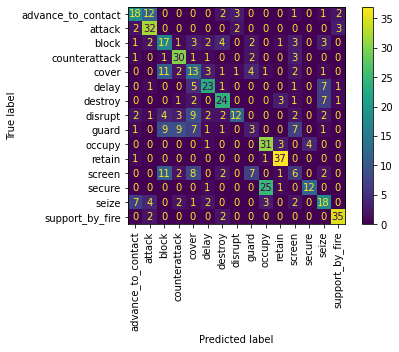

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["advance_to_contact",
                                                            "attack",
                                                            "block",
                                                            "counterattack",
                                                            "cover",
                                                            "delay",
                                                            "destroy",
                                                            "disrupt",
                                                            "guard",
                                                            "occupy",
                                                            "retain",
                                                            "screen",
                                                            "secure",
                                                            "seize",
                                                            "support_by_fire"])

disp.plot(xticks_rotation= "vertical")